In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as multi
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
metadata_dict = {}
metadata = pd.read_csv('/home/mar/Documents/TFM/GitHub/HB_PublicData/1-Obtaining-DEGs-for-HB/Metadata_HB/HB_joint_METADATA.tsv',sep='\t')
lst = []
for i in metadata['type']:
    if str(i).startswith('Hepatoblastoma'):
        lst.append('case')
    elif str(i).startswith('Normal'):
        lst.append('control')
    else:
        lst.append('other')
metadata['class'] = lst
metadata_dict = pd.Series(metadata['class'].values,index=metadata['sample']).to_dict()

In [5]:
def stats(data_path):
    data = pd.read_csv(data_path, sep=';', index_col=0)
    data.columns = data.columns.map(metadata_dict)

    # Independent Unequal Variance T-Test per gene
    mean_case = []
    mean_control = []
    for idx in tqdm(data.index):

        case = data['case'].loc[idx].tolist()
        control = data['control'].loc[idx].tolist()

        # Cohen's d effect size (i.e., standardized mean difference)
        # d=0.2 small; d=0.5 medium; d=0.8 large

        mean_case.append(np.mean(case))
        mean_control.append(np.mean(control))

    data['mean_case'] = mean_case
    data['mean_control'] = mean_case
 

    data = data[['mean_case','mean_control']]

    return data


In [6]:
# GSE89775
GSE89775 = stats('/home/mar/Documents/TFM/May/Task1_v2/Matrices_HB/GSE89775_matrix.txt')

100%|██████████| 45000/45000 [01:57<00:00, 382.50it/s]


In [7]:
GSE89775.head()

,mean_case,mean_control
gene,,
5S_rRNA,0.000000,0.000000
A1BG,11.280865,11.280865
A1CF,8.354749,8.354749
A2M,14.328319,14.328319
A2M-AS1,4.221117,4.221117


In [8]:
GSE89775_case = GSE89775['mean_case'].values
GSE89775_control = GSE89775['mean_control'].values

In [9]:
# GSE104766
GSE104766 = stats('/home/mar/Documents/TFM/May/Task1_v2/Matrices_HB/GSE104766_matrix.txt')

100%|██████████| 39331/39331 [05:21<00:00, 122.26it/s]


In [10]:
GSE104766_case = GSE104766['mean_case'].values
GSE104766_control = GSE104766['mean_control'].values

In [11]:
# GSE151347
GSE151347 = stats('/home/mar/Documents/TFM/May/Task1_v2/Matrices_HB/GSE151347_matrix.txt')

100%|██████████| 28516/28516 [01:17<00:00, 370.15it/s]


In [12]:
GSE151347_case = GSE151347['mean_case'].values
GSE151347_control = GSE151347['mean_control'].values

https://www.scribbr.com/statistics/statistical-tests/

## Statistical assumption
*Homogeneity of variance:* the variance within each group being compared is similar among all groups. If one group has much more variation than others, it will limit the test’s effectiveness.

## Types of variables
*Quantitative variables:* represent amounts of things (e.g. the number of trees in a forest). Types of quantitative variables include: *Continous*

## Types of tests
*Comparison tests* -> *Independent t-test*

* Predictor variable: Categorical, 1 Predictor
* Outcome variable: Quantitative, groups come from different populations

In [13]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [14]:
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

In [15]:
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

### Control Samples

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

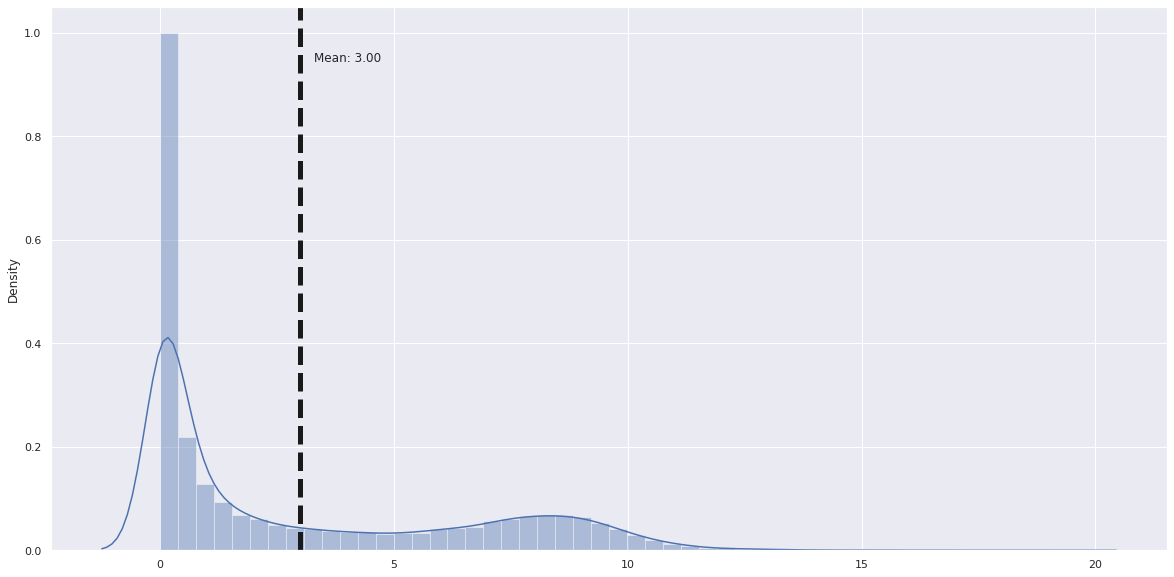

In [16]:
plot_distribution(GSE89775_control)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

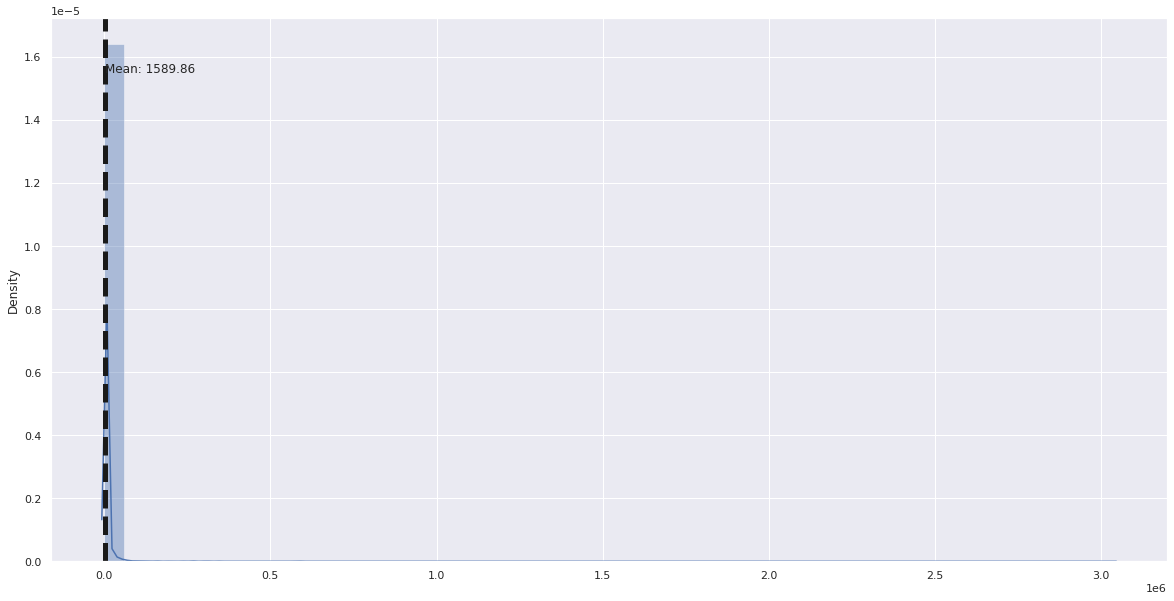

In [17]:
plot_distribution(GSE104766_control)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

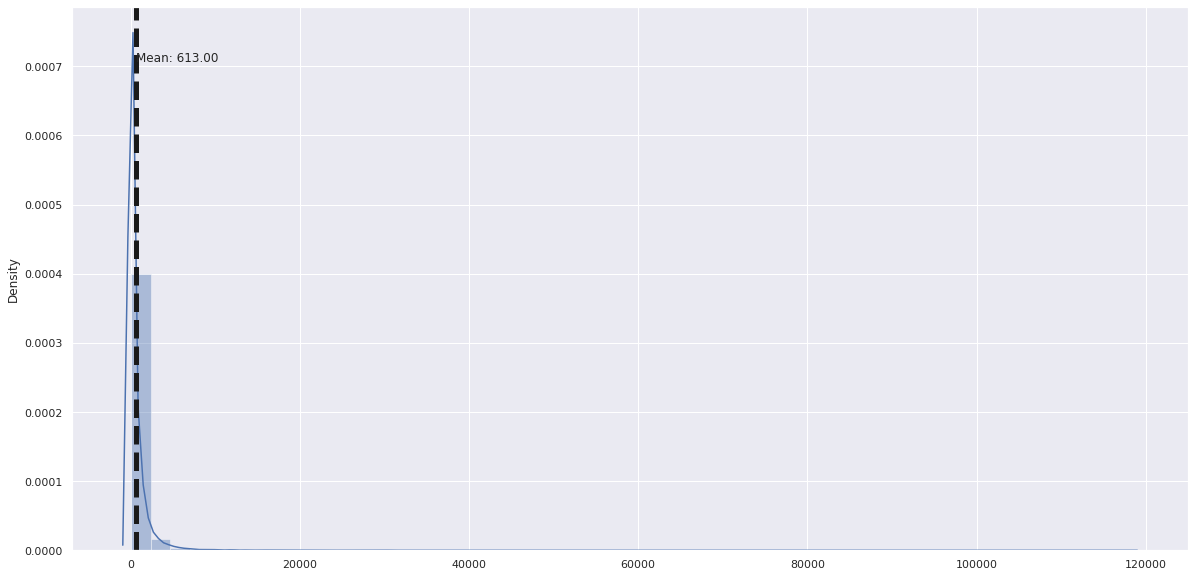

In [18]:
plot_distribution(GSE151347_control)

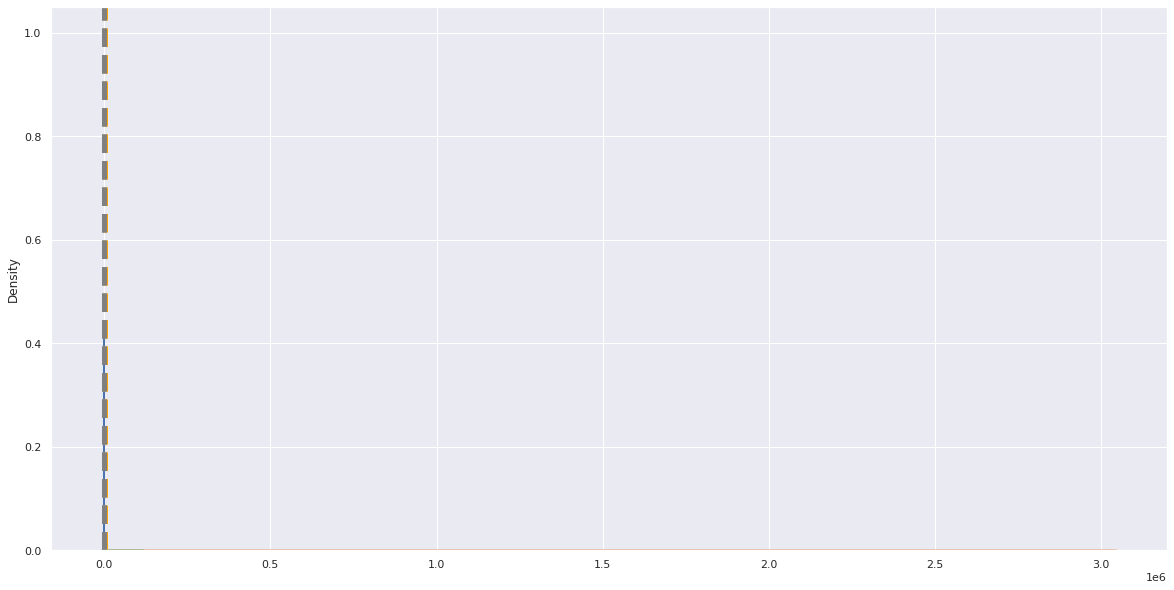

In [19]:
plt.figure()
ax1 = sns.distplot(GSE89775_case)
ax2 = sns.distplot(GSE104766_case)
ax3 = sns.distplot(GSE151347_case)
plt.axvline(np.mean(GSE89775_case), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(GSE104766_case), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(GSE151347_case), color='grey', linestyle='dashed', linewidth=5)

In [20]:
def compare_2_groups(arr_1, arr_2, alpha, sample_size):
    stat, p = ttest_ind(arr_1, arr_2)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print('Same distributions (fail to reject H0)')
    else:
        print('Different distributions (reject H0)')

In [21]:
sample_size = 1000
ger_sampled = np.random.choice(GSE89775_control, sample_size)
fr_sampled = np.random.choice(GSE104766_control, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=-2.592, p=0.010
Different distributions (reject H0)


In [22]:
sample_size = 1000
ger_sampled = np.random.choice(GSE89775_control, sample_size)
fr_sampled = np.random.choice(GSE151347_control, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=-14.684, p=0.000
Different distributions (reject H0)


In [23]:
sample_size = 1000
ger_sampled = np.random.choice(GSE104766_control, sample_size)
fr_sampled = np.random.choice(GSE151347_control, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=2.264, p=0.024
Different distributions (reject H0)


### Case Samples

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

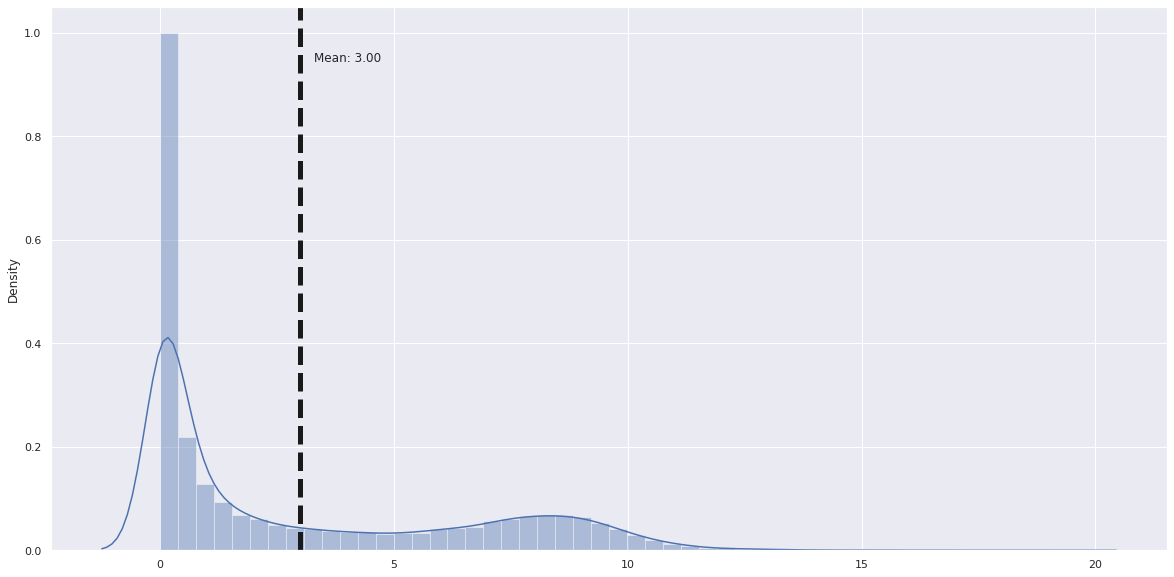

In [24]:
plot_distribution(GSE89775_case)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

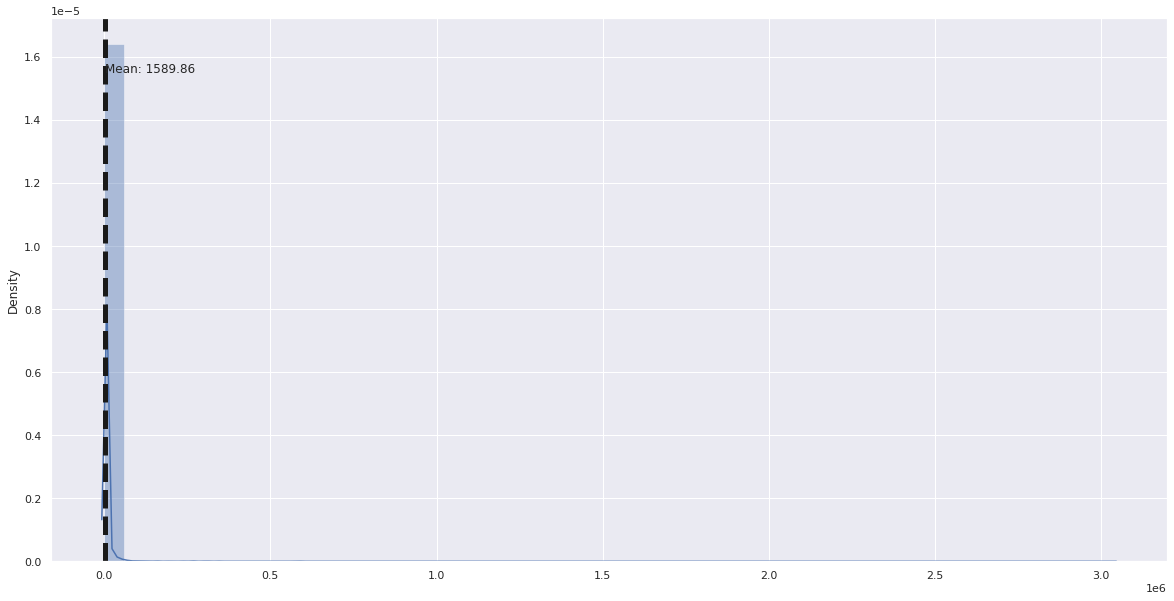

In [25]:
plot_distribution(GSE104766_case)

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

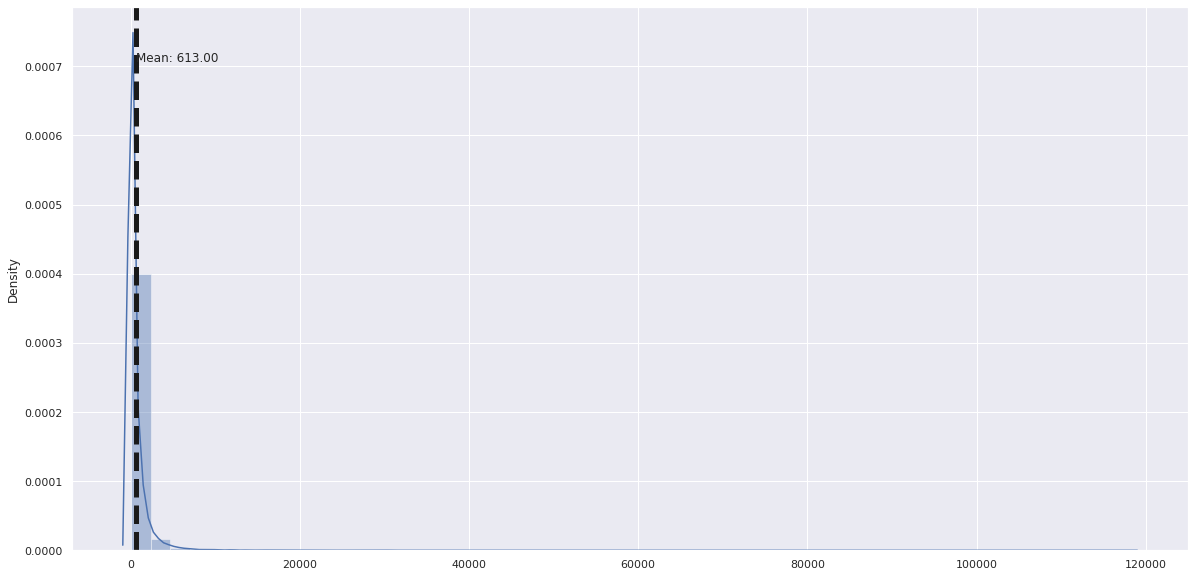

In [26]:
plot_distribution(GSE151347_case)

<AxesSubplot:ylabel='Density'>

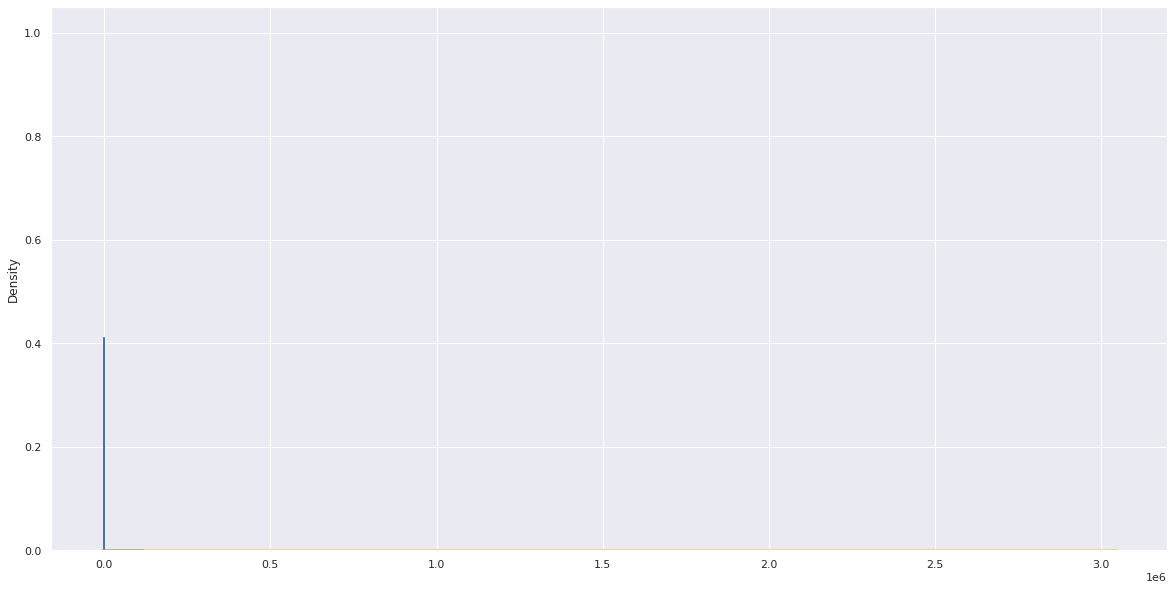

In [37]:
plt.figure()
sns.distplot(GSE89775_case, color='b', kde=True)
sns.distplot(GSE104766_case, color='orange', kde=True)
sns.distplot(GSE151347_case, color='grey', kde=True)

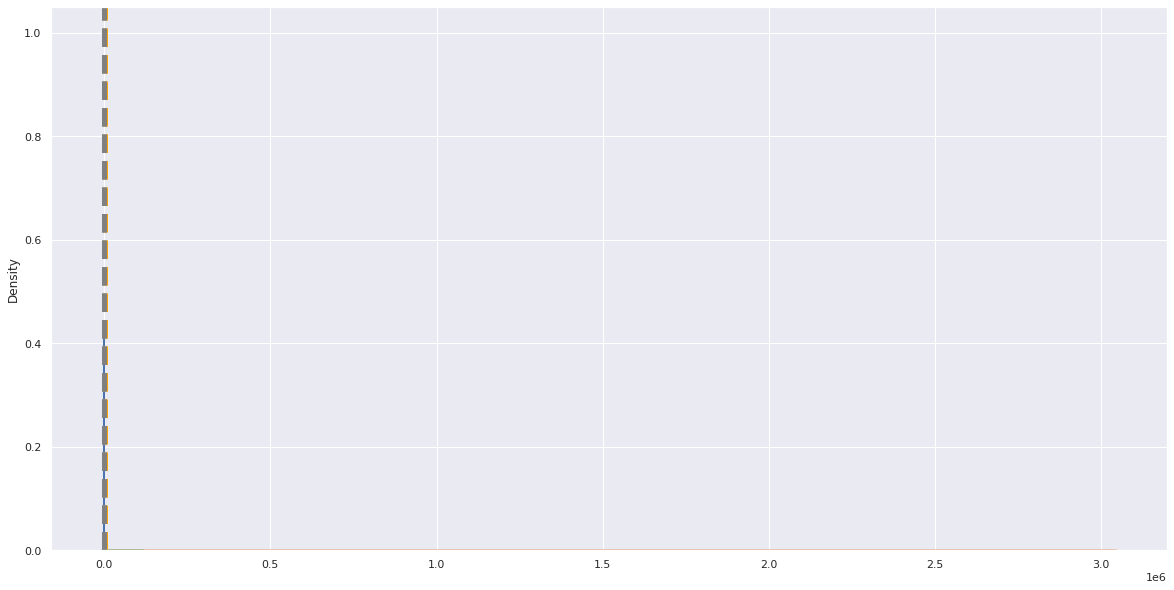

In [27]:
plt.figure()
ax1 = sns.distplot(GSE89775_case)
ax2 = sns.distplot(GSE104766_case)
ax3 = sns.distplot(GSE151347_case)
plt.axvline(np.mean(GSE89775_case), color='b', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(GSE104766_case), color='orange', linestyle='dashed', linewidth=5)
plt.axvline(np.mean(GSE151347_case), color='grey', linestyle='dashed', linewidth=5)

In [28]:
sample_size = 1000
ger_sampled = np.random.choice(GSE89775_case, sample_size)
fr_sampled = np.random.choice(GSE104766_case, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=-4.484, p=0.000
Different distributions (reject H0)


In [29]:
sample_size = 1000
ger_sampled = np.random.choice(GSE89775_case, sample_size)
fr_sampled = np.random.choice(GSE151347_case, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=-5.844, p=0.000
Different distributions (reject H0)


In [30]:
sample_size = 1000
ger_sampled = np.random.choice(GSE104766_case, sample_size)
fr_sampled = np.random.choice(GSE151347_case, sample_size)
compare_2_groups(ger_sampled, fr_sampled, 0.05, sample_size)

Statistics=1.203, p=0.229
Same distributions (fail to reject H0)
